In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score , r2_score
from scipy.stats import pearsonr
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

In [2]:
os.chdir('G:\\Campus\\4th Year\\Stat in Practice 2\\Project\\Research Proposal\\Data')

In [3]:
df = pd.read_csv('abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
#Removing rows which has Height = 0
df = df[(df['Height'] > 0) & (df['Height'] < 1)]
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4174,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.524081,0.407953,0.139346,0.829061,0.359483,0.180668,0.238859,9.935553
std,NaN,0.120079,0.099228,0.038811,0.490395,0.221980,0.109614,0.139219,3.224474
min,NaN,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.442125,0.186125,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.153750,0.502000,0.253000,0.328875,11.000000


In [5]:
num_dependents = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight']
# Calculate the outlier percentage for each variable
outlier_percentages = []
for variable in num_dependents:
    # Assuming 'df' is your DataFrame and the column name matches the variable
    
    # Calculate the quartiles
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    
    # Calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Count the number of outliers
    outliers = df[(df[variable] < lower_bound) | (df[variable] > upper_bound)][variable].count()
    
    # Calculate the outlier percentage
    outlier_percentage = outliers / len(df) * 100
    
    # Append the outlier percentage to the list
    outlier_percentages.append(outlier_percentage)
    
    # Remove the outliers from the DataFrame
    df = df[(df[variable] >= lower_bound) & (df[variable] <= upper_bound)]
    
    # Print the outlier percentage for the current variable
    print(f"{variable}: {outlier_percentage:.2f}%")

# Print the updated DataFrame without outliers
print("\nUpdated DataFrame without outliers:")
print(df.describe(include='all'))

Length: 1.17%
Diameter: 0.29%
Height: 0.12%
Whole weight: 0.68%
Shucked weight: 0.61%
Viscera weight: 0.35%
Shell weight: 0.69%

Updated DataFrame without outliers:
         Sex       Length     Diameter       Height  Whole weight  \
count   4013  4013.000000  4013.000000  4013.000000   4013.000000   
unique     3          NaN          NaN          NaN           NaN   
top        M          NaN          NaN          NaN           NaN   
freq    1463          NaN          NaN          NaN           NaN   
mean     NaN     0.524533     0.408242     0.139090      0.809481   
std      NaN     0.110511     0.091758     0.035588      0.445060   
min      NaN     0.205000     0.155000     0.040000      0.042500   
25%      NaN     0.450000     0.350000     0.115000      0.447500   
50%      NaN     0.540000     0.420000     0.140000      0.794500   
75%      NaN     0.610000     0.480000     0.165000      1.133000   
max      NaN     0.760000     0.600000     0.240000      2.127500   

      

In [6]:
# Creating dummy variables for 'Sex'
df = pd.get_dummies(df, columns=['Sex'], prefix=['Sex'])

# Dropping one dummy column to avoid multicollinearity (Sex_I would then be the base category)
df.drop('Sex_I', axis=1, inplace=True)
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,0


In [7]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X = df.drop('Rings', axis = 1)
y = df['Rings']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RMSE of test data: 2.0912131583285922
RMSE of training data: 1.6745611293670055
MAPE: 14.89%
Accuracy of predicting rounded values: 85.11%
Correlation coefficient: 0.7441768582872317
R-squared value: 0.5578118937046503


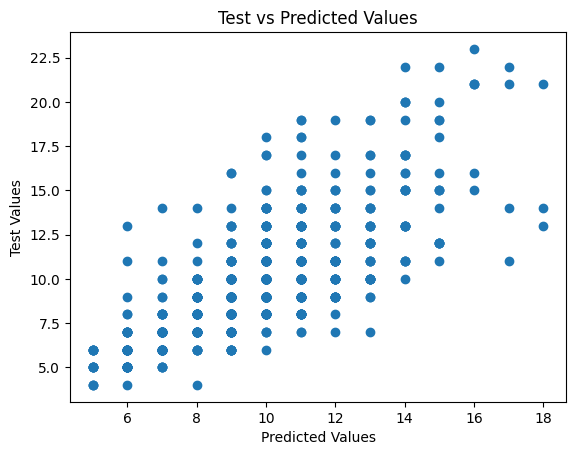

In [8]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest model
model = RandomForestRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [8, 10, 12],
    'min_samples_split': [4, 6, 8, 10]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
model = grid_search.best_estimator_

# Predict on the test set
y_pred = model.predict(X_test)

# Round the predicted values
y_pred_round = np.round(y_pred)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("RMSE of test data:", np.sqrt(mse))

# Predict on the training set
y_pred_train = model.predict(X_train)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
print("RMSE of training data:", np.sqrt(mse_train))

# Calculate the MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"MAPE: {mape:.2f}%")

# Calculate the accuracy of predicting rounded values
accuracy = round(100-mape,4)
print(f"Accuracy of predicting rounded values: {accuracy:.2f}%")

# Calculate the correlation coefficient between y_test and y_pred_round
correlation_coef, _ = pearsonr(y_test, y_pred_round)
print("Correlation coefficient:", correlation_coef)

# Calculate the R-squared value
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)

# Test vs Predicted plot
plt.scatter(y_pred_round, y_test)
plt.xlabel('Predicted Values')
plt.ylabel('Test Values')
plt.title('Test vs Predicted Values')
plt.show()